In [5]:
from google.colab import files
uploaded = files.upload()


Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015.csv


In [6]:
from google.colab import files
uploaded = files.upload()


Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015.csv


In [7]:
from google.colab import files
uploaded = files.upload()


Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015.csv


In [8]:
import pandas as pd

df_binary = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df_5050 = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_012 = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

df_binary.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df_binary.drop(columns=['Diabetes_binary'])
y = df_binary['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)
print("Original class distribution in training set:")
print(Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nResampled class distribution after SMOTE:")
print(Counter(y_train_smote))

Original class distribution in training set:
Counter({0.0: 152834, 1.0: 24742})

Resampled class distribution after SMOTE:
Counter({0.0: 152834, 1.0: 152834})


In [11]:

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from collections import Counter

X = df_binary.drop(columns=['Diabetes_binary'])
y = df_binary['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Original training class distribution:")
print(Counter(y_train))

adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)

print("\nResampled training class distribution (ADASYN):")
print(Counter(y_train_ada))


Original training class distribution:
Counter({0.0: 152834, 1.0: 24742})

Resampled training class distribution (ADASYN):
Counter({0.0: 152834, 1.0: 150294})


Upload diabetes_binary_health_indicators_BRFSS2015.csv


Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015.csv
Upload diabetes_binary_5050split_health_indicators_BRFSS2015.csv


Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015.csv
Upload diabetes_012_health_indicators_BRFSS2015.csv


Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015.csv


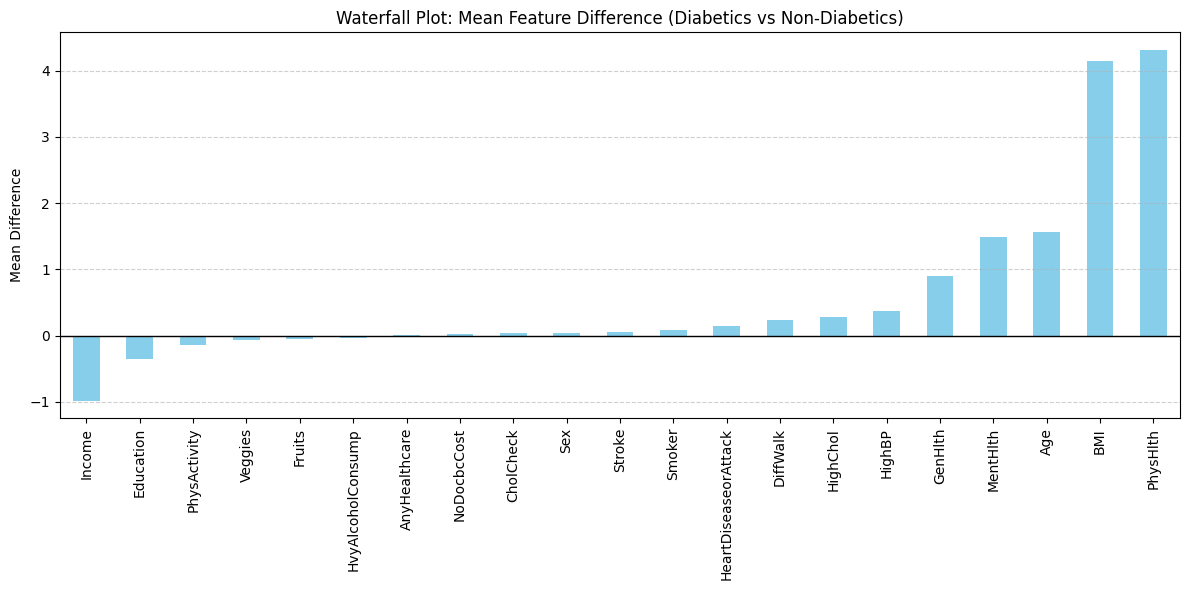

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

print("Upload diabetes_binary_health_indicators_BRFSS2015.csv")
uploaded1 = files.upload()
print("Upload diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
uploaded2 = files.upload()
print("Upload diabetes_012_health_indicators_BRFSS2015.csv")
uploaded3 = files.upload()

df_binary = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df_5050 = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_012 = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

mean_diff = df_binary[df_binary['Diabetes_binary'] == 1].mean() - df_binary[df_binary['Diabetes_binary'] == 0].mean()
mean_diff = mean_diff.drop('Diabetes_binary')
mean_diff_sorted = mean_diff.sort_values()

plt.figure(figsize=(12, 6))
mean_diff_sorted.plot(kind='bar', color='skyblue')
plt.axhline(0, color='black', linewidth=1)
plt.title('Waterfall Plot: Mean Feature Difference (Diabetics vs Non-Diabetics)')
plt.ylabel('Mean Difference')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

<ipython-input-3-ed49efa45dbb>:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


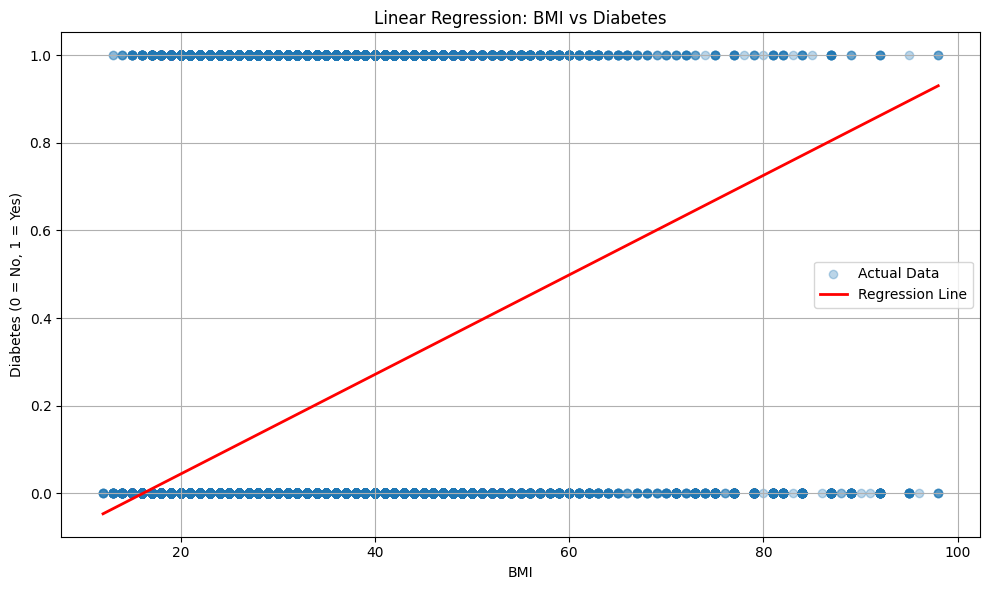

In [3]:
X = df_binary[['BMI']].values
y = df_binary['Diabetes_binary'].values
model = LinearRegression()
model.fit(X, y)

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_preds = model.predict(x_vals)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label='Actual Data')
plt.plot(x_vals, y_preds, color='red', linewidth=2, label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Diabetes (0 = No, 1 = Yes)')
plt.title('Linear Regression: BMI vs Diabetes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


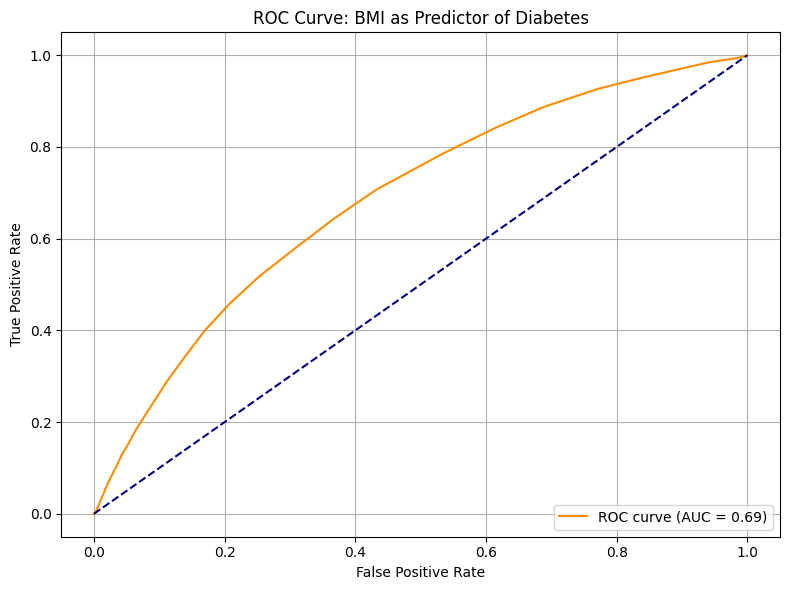

In [4]:
X = df_binary[['BMI']]
y = df_binary['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: BMI as Predictor of Diabetes')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


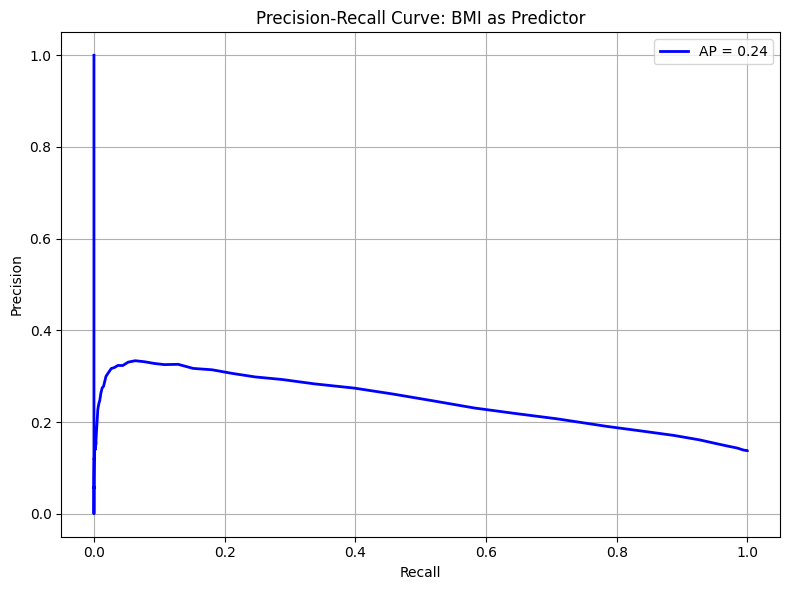

In [6]:
X = df_binary[['BMI']]
y = df_binary['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: BMI as Predictor')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


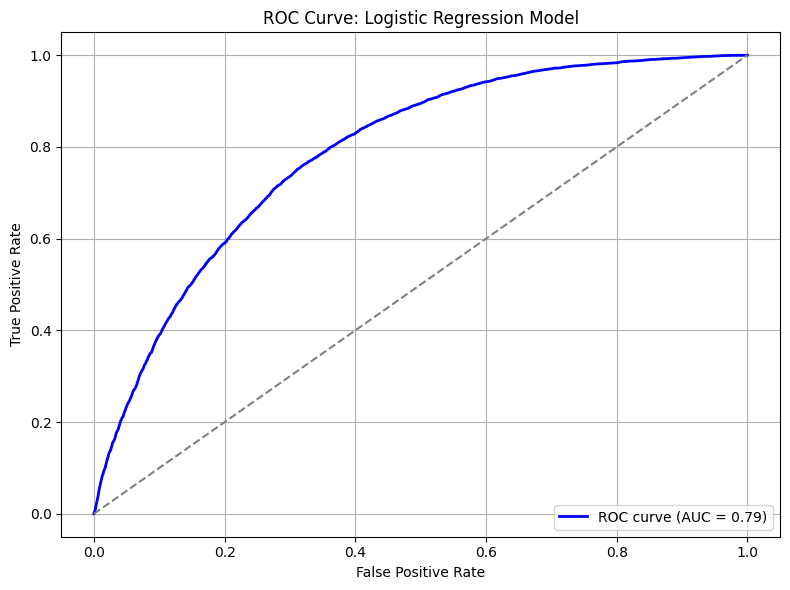

In [7]:
features = ['BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'PhysActivity']
X = df_binary[features]
y = df_binary['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


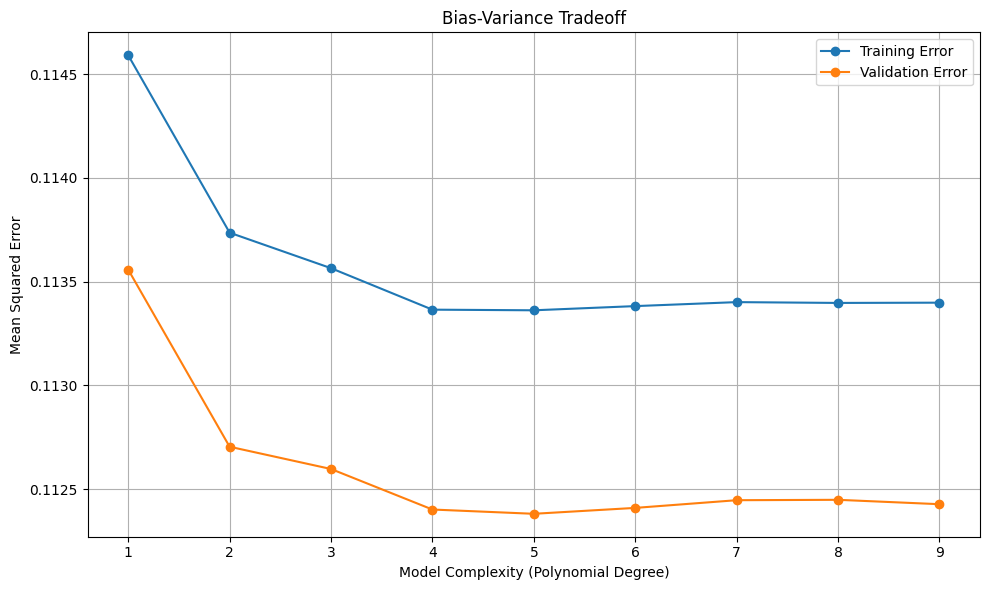

In [8]:
X = df_binary[['BMI']].values
y = df_binary['Diabetes_binary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_errors = []
test_errors = []
degrees = range(1, 10)
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Validation Error', marker='o')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
df_binary = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
features = ['BMI', 'Age', 'HighBP', 'PhysActivity', 'CholCheck']
X = df_binary[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.title('K-Means Clustering (2 Clusters, PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [1]:
features = ['BMI', 'Age', 'HighBP', 'PhysActivity', 'CholCheck']
X = df_binary[features]
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_binary['Diabetes_binary'], cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA: Dimensionality Reduction')
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'df_binary' is not defined